In [ ]:
!echo $PATH

: 

In [5]:
# import required packages
%cd /Users/namir_oues/Documents/PhD/MDSubSampler
import mdss.protein_data as prot
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import tempfile
from IPython.display import Image, display
import os

/Users/namir_oues/Documents/PhD/MDSubSampler


In [6]:
# set paths and all required arguments¶
trajectory_file = "data/input.xtc" 
topology_file = "data/input.gro" 
size_list = [0.25, 0.5, 1.0, 2.5, 5.0, 10.0, 20.0, 25.0, 50.0] 
atom_selection= "name CA" 
dissimilarity_measure = d.Bhattacharyya

# set a temporary directory to save all output files
temp_dir = tempfile.mkdtemp()

In [7]:
# create a protein data object
p_data = prot.ProteinData(trajectory_file,topology_file,config_parameters=None)

In [8]:
# create a protein property object
p_property = gp.RMSD(p_data, atom_selection, fit=True)

In [9]:
# calculate reference property for full trajectory
p_property.calculate_property()

In [10]:
# create random sampler object 
sampler = s.RandomSampler(
            protein_property=p_property,
            protein_data=p_data,
            seed_number=1999,
            output_folder=temp_dir,
            file_prefix='sc1',
            dissimilarity_measure=dissimilarity_measure,
        )

In [11]:
# generate sampled property and trajectories for all sample sizes provided in the list
sampled_property = sampler.scan_sample_size(
            perc_vector=size_list,
            dissimilarity_threshold=None,
            step_recording = True
        )

<Figure size 432x288 with 0 Axes>

In [12]:
# check the output files generated in the temporary directory 
print(os.listdir(temp_dir))

['sc1_50_0_RMSD.xtc', 'sc1_0_5_RMSD.dat', 'sc1_20_0_RMSD.dat', 'sc1_5_0_RMSD.xtc', 'sc1_0_5_RMSD_plot.png', 'sc1_5_0_RMSD_plot.png', 'sc1_25_0_RMSD.dat', 'sc1_2_5_RMSD.dat', 'sc1_25_0_RMSD_plot.png', 'sc1_5_0_RMSD.npy', 'sc1_50_0_RMSD_plot.png', 'sc1_50_0_RMSD.npy', 'sc1_0_25_RMSD.dat', 'sc1_10_0_RMSD_plot.png', 'sc1_10_0_RMSD.dat', 'sc1_1_0_RMSD.dat', 'sc1_1_0_RMSD.xtc', 'sc1_10_0_RMSD.xtc', 'sc1_0_25_RMSD_plot.png', 'sc1_0_25_RMSD.xtc', 'sc1_25_0_RMSD.npy', 'sc1_1_0_RMSD_plot.png', 'sc1_0_5_RMSD.npy', 'sc1_20_0_RMSD.npy', 'sc1_20_0_RMSD_plot.png', 'sc1_2_5_RMSD.xtc', 'sc1_25_0_RMSD.xtc', 'sc1_0_25_RMSD.npy', 'sc1_10_0_RMSD.npy', 'sc1_1_0_RMSD.npy', 'sc1_2_5_RMSD_plot.png', 'sc1_2_5_RMSD.npy', 'sc1_5_0_RMSD.dat', 'sc1_20_0_RMSD.xtc', 'sc1_0_5_RMSD.xtc', 'sc1_50_0_RMSD.dat']


sc1_0_5_RMSD_plot.png


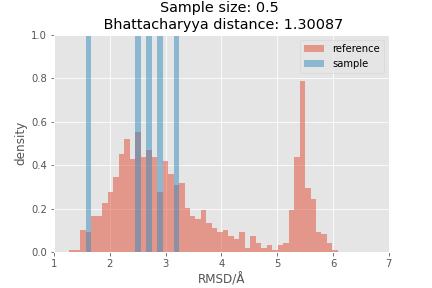

sc1_5_0_RMSD_plot.png


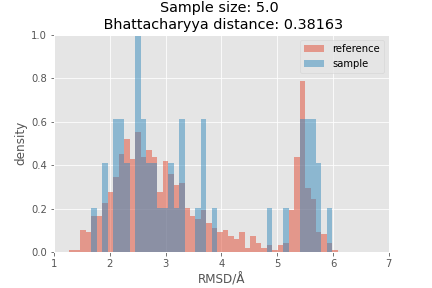

sc1_25_0_RMSD_plot.png


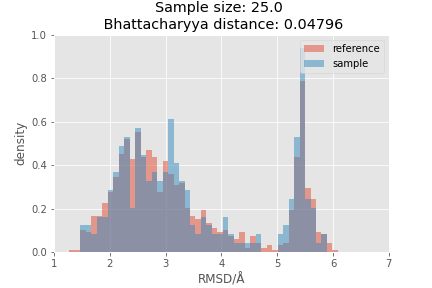

sc1_50_0_RMSD_plot.png


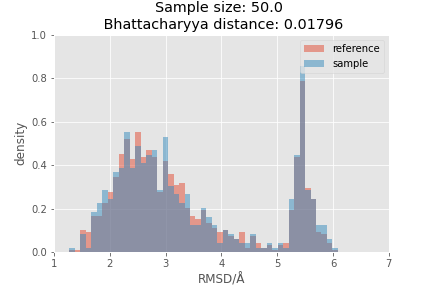

sc1_10_0_RMSD_plot.png


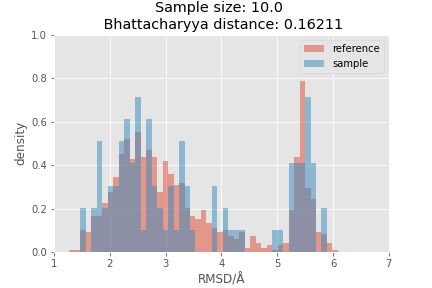

sc1_0_25_RMSD_plot.png


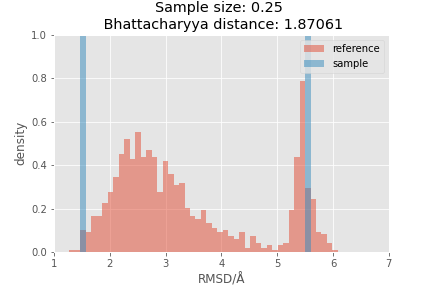

sc1_1_0_RMSD_plot.png


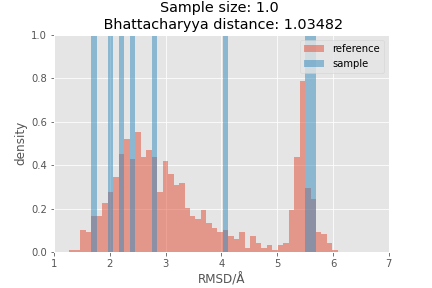

sc1_20_0_RMSD_plot.png


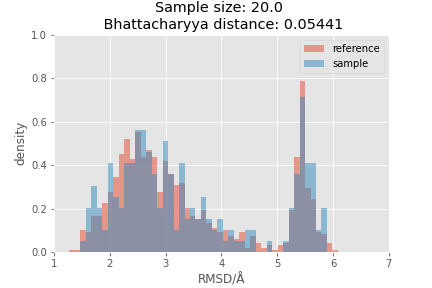

sc1_2_5_RMSD_plot.png


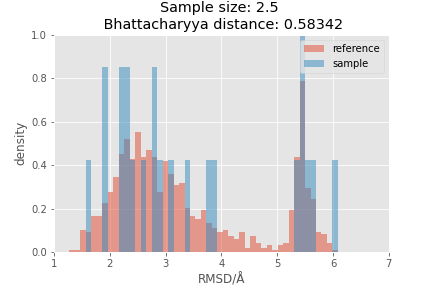

In [13]:
# display all distribution plots for all sample sizes 
for fname in (os.listdir(temp_dir)):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        print(fname)
        display(Image(filename=fpath))

In [15]:
# display tables with calculated property for all different sample sizes
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.dat':
            with open(fpath, 'r') as file:
                contents = file.read()
                print(fname)
                print('-----------------------')
                print(contents)  
                print('-----------------------')

sc1_0_5_RMSD.dat
-----------------------
556 2.926010009672862
14 1.593266864584502
578 3.1811864871838242
544 2.6988880626389866
347 2.5324004742619377

-----------------------
sc1_20_0_RMSD.dat
-----------------------
210 2.6232155651870923
607 2.905163859121594
129 2.121820010681548
680 3.973223438416041
438 4.1529955274748875
340 2.5941849016762237
761 3.440332817498029
828 5.8399171348673145
83 3.4638104459659695
895 5.3911011273976275
565 2.252090723301407
463 2.58896333570468
993 5.322810423138265
593 3.666762700862496
560 2.674725105577736
837 5.6013097188758785
984 5.391045240091914
42 2.7286774063690142
94 3.784799030915748
806 5.589043652012831
857 5.533049570581839
14 1.593266864584502
53 3.960074458755785
897 5.456413386520397
286 1.7342237214591902
994 5.425974752338691
167 1.5735368774508938
464 3.2533258806025476
20 1.819295034842841
882 5.4496247979199195
522 2.7209053100595106
980 5.322304326121734
643 4.438326609159919
760 3.0739040834596683
229 1.9681082296407009
62